# TITANIC: Kaggle competition

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: INTERMEDIATE**

Vamos a participar en la competicion de **Kaggle del Titanic**: https://www.kaggle.com/competitions/titanic <br> Para ello atacaremos 3 puntos clave para obtener el mejor modelo posible:
* ML Preprocessing
* Competicion de modelos
* Hiperparametros
<br><br>
A diferencia de en el flujo ML convencional, en las competiciones de Kaggle no haremos la evaluación del TEST en el notebook, sino que tendremos que subir un predict del test a la plataforma de submissions y la plataforma lo evaluará.
<br><br>
...A POR ELLO!

# Librerias

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab
from sklearn.preprocessing import OrdinalEncoder


pd.set_option('display.max_columns', None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_SUPERVISADO/Notebooks/ML3 - Kaggle competition/titanic_train.csv')

In [ ]:
print(df.shape)

(891, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()
#survived como target
#sacar la longitud del nombre; es un dato generalizable. Los nombres no son generalizables, su longitud si.
#ticket no es un dato generalizable, nombre solo longitd, eliminar ticket y cabina quedarse solamente con la primera letra solamente, PassengerId ponerlo en el indice

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Name_Length'] = df['Name'].str.len()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_Length  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


<Axes: >

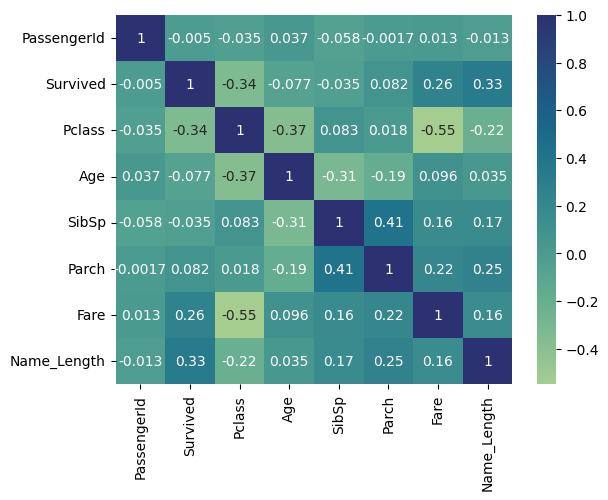

In [ ]:
sns.heatmap(df.corr(numeric_only = True) , annot=True, cmap = 'crest')

In [ ]:
# Longitud nombre
df['Name'].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [ ]:
# Si quisieramos saber el numero de palabras de la columna Name
# df["Name"].apply(lambda n: len(n.split()))

In [ ]:
# Primera letra cabina
df['Cabin_letter'] = df['Cabin'].str[0]

In [ ]:
df.set_index('PassengerId', inplace=True)

In [ ]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Length,Cabin_letter
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,NaN


# ML Preprocessing

## Data cleaning

El step del data cleaning es el cajón de sastre donde corregiremos las particularidades del dataset más allá del ML preprocessing estandar. Por ejemplo:
* Eliminar registros duplicados
* Eliminar filas sin target informado
* Eliminar columnas irrelevantes
* Corregir erratas en literales
* Corregir data types

In [ ]:
df.duplicated().sum()

0

In [ ]:
del df["Ticket"]

In [ ]:
del df["Cabin"]

In [ ]:
del df["Name"]

## EDA

Analisis de las distribuciones de las variables.

In [ ]:
target = 'Survived'
features = df.columns[df.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Name_Length,891.0,26.965208,9.281607,12.00,20.0000,25.0000,30.0,82.0000


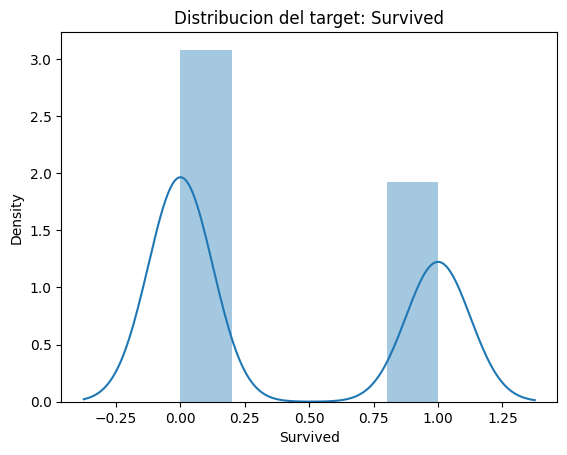

In [ ]:
#Distribucion target
sns.distplot(y)
plt.title('Distribucion del target: '+target)
plt.show()


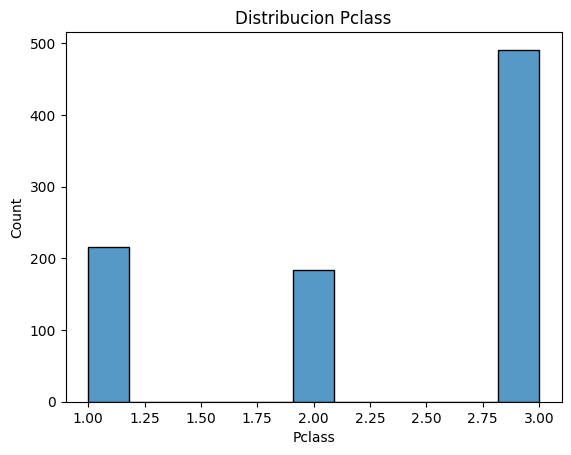

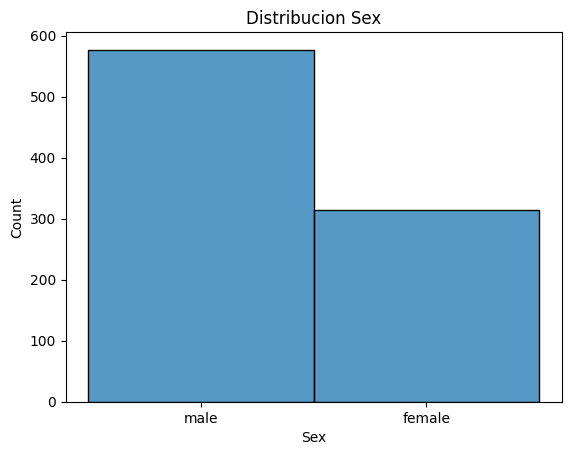

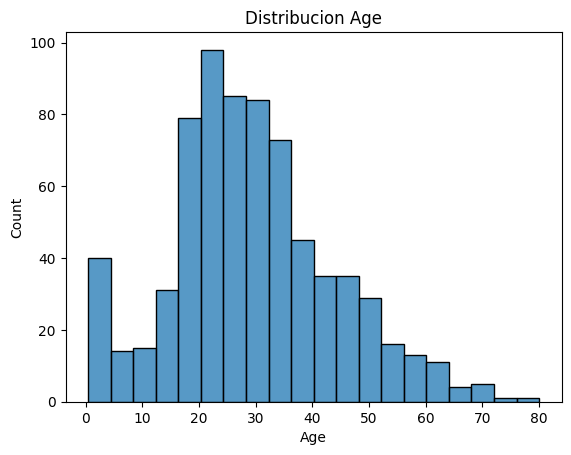

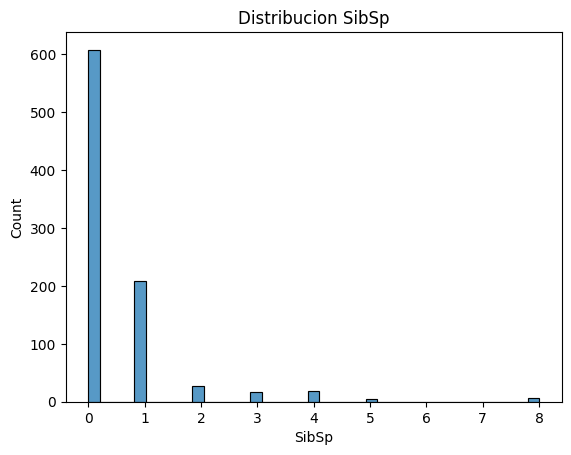

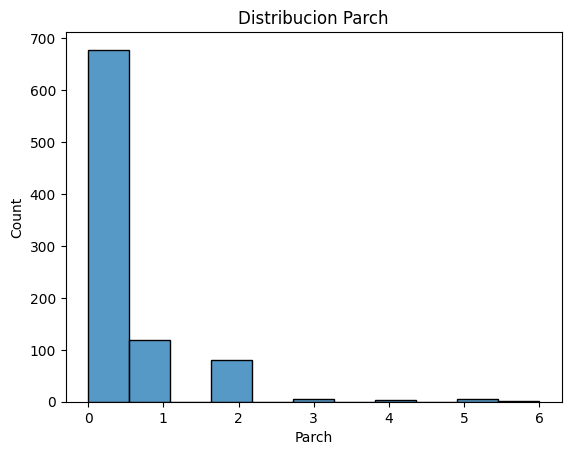

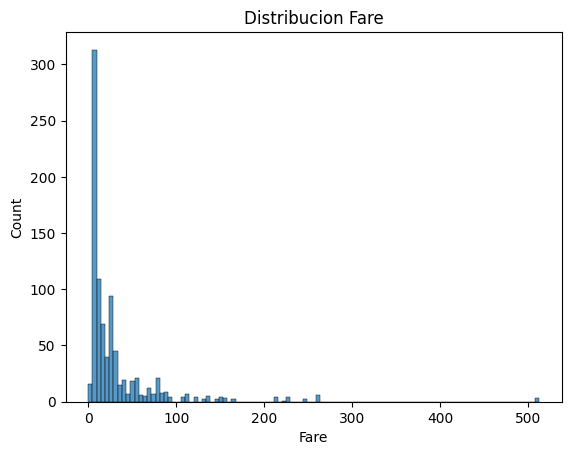

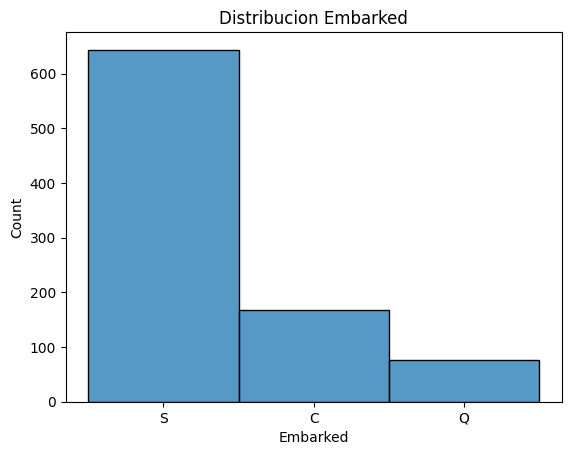

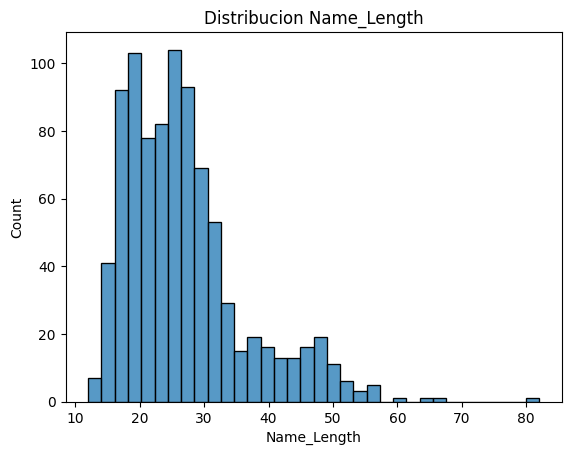

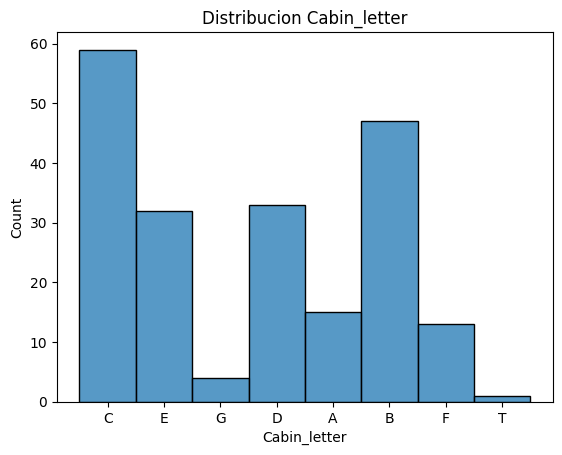

In [ ]:
for i in features:
  sns.histplot(X[i])
  plt.title('Distribucion '+i)
  plt.show()

## Imputar valores en nulos

Algunas de las estrategias mas comunes:
* Imputar valor outlier (-999, 'Unknown')
* Imputar media en numericos
* Imputar moda en categoricos
* Imputar 0

In [ ]:
df.isna().sum()

Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          2
Name_Length       0
Cabin_letter    687
dtype: int64

In [ ]:
df=df.fillna({
    'Age':-999,
    'Embarked': "Sin_embarque",
    'Cabin_letter': "Sin_cabin",
    })

In [ ]:
df.isna().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Name_Length     0
Cabin_letter    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Length,Cabin_letter
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,23,Sin_cabin
2,1,1,female,38.0,1,0,71.2833,C,51,C
3,1,3,female,26.0,0,0,7.9250,S,22,Sin_cabin
4,1,1,female,35.0,1,0,53.1000,S,44,C
5,0,3,male,35.0,0,0,8.0500,S,24,Sin_cabin


## Encoding categoricos

3 opciones:
* Si tienen un sentido ordinal -> convertir a numerico.
* Si tienen un sentido cardinal:
  * 2 posibles categorias -> indicador booleano
  * más de 2 categorias -> One-Hot-Encoding

In [ ]:
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['Sex', 'Embarked', 'Cabin_letter']


In [ ]:
# Cabin_letter tiene  un sentido ordinal -> convertir a numerico con OrdinalEncoding
df["Cabin_letter"].value_counts()

Sin_cabin    687
C             59
B             47
D             33
E             32
A             15
F             13
G              4
T              1
Name: Cabin_letter, dtype: int64

In [ ]:
# values_cabin_letter = {"Sin_cabin": 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}

In [ ]:
oe = OrdinalEncoder(categories=[["Sin_cabin", "A", "B", "C", "D", "E", "F", "G", "T"]])

In [ ]:
df["Cabin_INT"]= oe.fit_transform(df[["Cabin_letter"]])

In [ ]:
df["Cabin_INT"].value_counts()

0.0    687
3.0     59
2.0     47
4.0     33
5.0     32
1.0     15
6.0     13
7.0      4
8.0      1
Name: Cabin_INT, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Embarked      891 non-null    object 
 8   Name_Length   891 non-null    int64  
 9   Cabin_letter  891 non-null    object 
 10  Cabin_INT     891 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Length,Cabin_letter,Cabin_INT
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,23,Sin_cabin,0.0
2,1,1,female,38.0,1,0,71.2833,C,51,C,3.0
3,1,3,female,26.0,0,0,7.9250,S,22,Sin_cabin,0.0
4,1,1,female,35.0,1,0,53.1000,S,44,C,3.0
5,0,3,male,35.0,0,0,8.0500,S,24,Sin_cabin,0.0


In [ ]:
categories.remove("Cabin_letter")

In [ ]:
categories

['Sex', 'Embarked']

In [ ]:
# Sex tienen un sentido cardinal: 2 posibles categorias -> indicador booleano. male = 0, female = 1
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df["Sex_INT"] = np.where(df["Sex"]=="male",0,1)

In [ ]:
df["Sex_INT"].value_counts()

0    577
1    314
Name: Sex_INT, dtype: int64

In [ ]:
categories.remove("Sex")

In [ ]:
categories

['Embarked']

In [ ]:
# Con Embarked, tiene un sentido cardinal: conmás de 2 categorias -> One-Hot-EncodingOne Hot Encoding
df = pd.get_dummies(df, columns=categories)

In [ ]:
del df["Sex"]

In [ ]:
del df["Cabin_letter"]

In [ ]:
categories = list(df.select_dtypes(include='object').columns)
print('Total categoricas:', len(categories))

Total categoricas: 0


In [ ]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Length,Cabin_INT,Sex_INT,Embarked_C,Embarked_Q,Embarked_S,Embarked_Sin_embarque
PassengerId,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,23,0.0,0,0,0,1,0
2,1,1,38.0,1,0,71.2833,51,3.0,1,1,0,0,0
3,1,3,26.0,0,0,7.9250,22,0.0,1,0,0,1,0
4,1,1,35.0,1,0,53.1000,44,3.0,1,0,0,1,0
5,0,3,35.0,0,0,8.0500,24,0.0,0,0,0,1,0
6,0,3,-999.0,0,0,8.4583,16,0.0,0,0,1,0,0
7,0,1,54.0,0,0,51.8625,23,5.0,0,0,0,1,0
8,0,3,2.0,3,1,21.0750,30,0.0,0,0,0,1,0
9,1,3,27.0,0,2,11.1333,49,0.0,1,0,0,1,0


## Eliminar alta correlación

In [ ]:
df[df.select_dtypes("bool").columns] = df[df.select_dtypes("bool").columns].astype("int8")

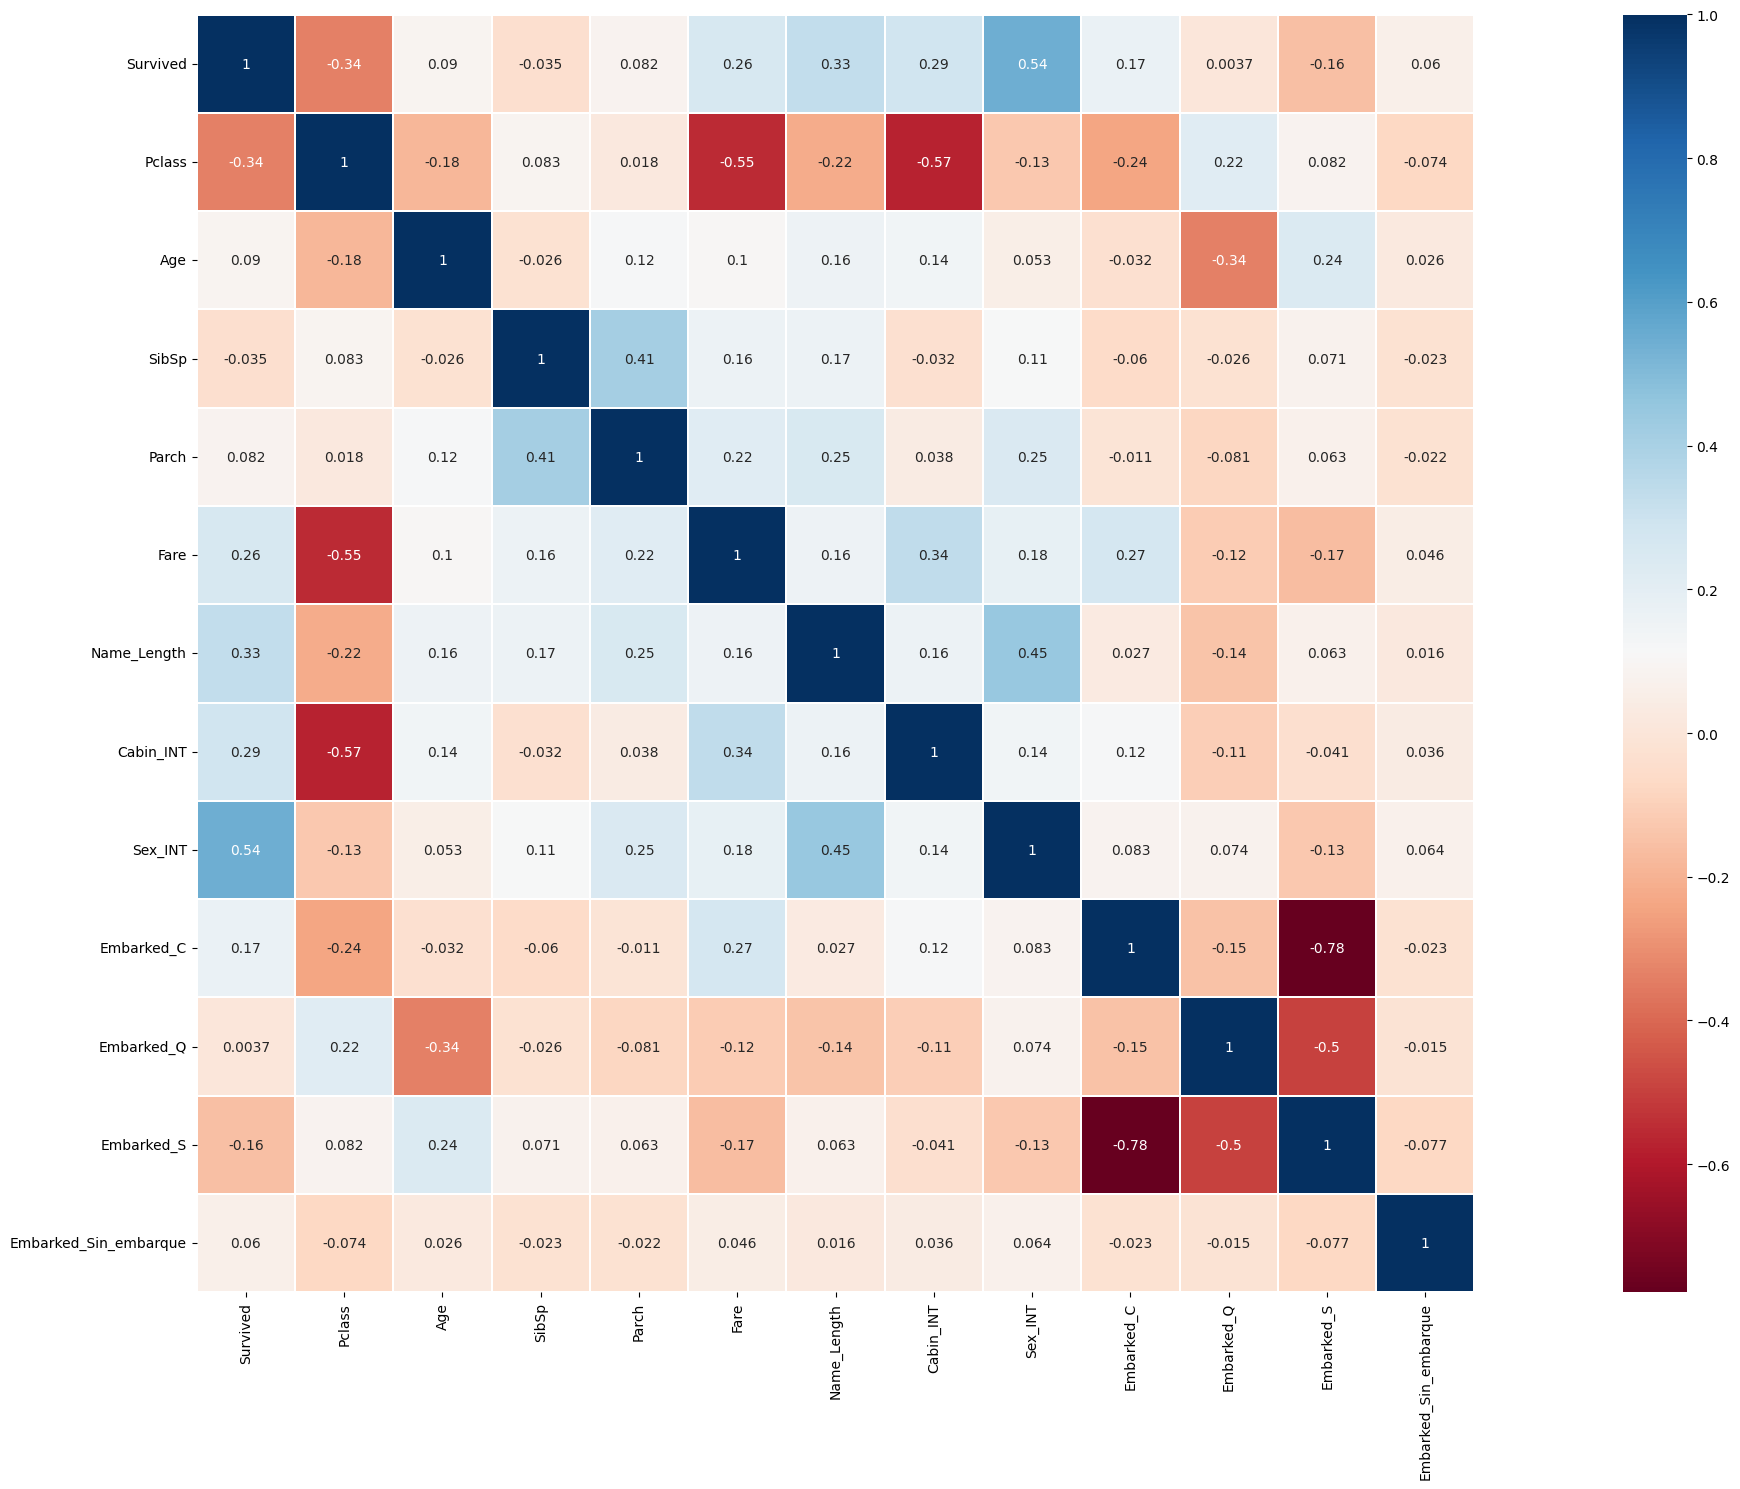

In [ ]:
fig, axes = plt.subplots(ncols=1, figsize=(30, 15))
# Crear los subplots utilizando Seaborn
colormap = plt.cm.RdBu
sns.heatmap (df.corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = 'white', annot = True)
colormap = plt.cm.RdBu
# Ajustar el espaciado entre los subplots
plt.tight_layout()
# Mostrar los subplots
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               891 non-null    int64  
 1   Pclass                 891 non-null    int64  
 2   Age                    891 non-null    float64
 3   SibSp                  891 non-null    int64  
 4   Parch                  891 non-null    int64  
 5   Fare                   891 non-null    float64
 6   Name_Length            891 non-null    int64  
 7   Cabin_INT              891 non-null    float64
 8   Sex_INT                891 non-null    int64  
 9   Embarked_C             891 non-null    uint8  
 10  Embarked_Q             891 non-null    uint8  
 11  Embarked_S             891 non-null    uint8  
 12  Embarked_Sin_embarque  891 non-null    uint8  
dtypes: float64(3), int64(6), uint8(4)
memory usage: 73.1 KB


In [ ]:
features = df.columns[df.columns!=target]
X = df[features]
y = df[target]
# Mismo analisis, pero desde una funcion que nos facilita la vida
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    return Z
highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete


In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Length,Cabin_INT,Sex_INT,Embarked_C,Embarked_Q,Embarked_S,Embarked_Sin_embarque
PassengerId,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,23,0.0,0,0,0,1,0
2,1,1,38.0,1,0,71.2833,51,3.0,1,1,0,0,0
3,1,3,26.0,0,0,7.9250,22,0.0,1,0,0,1,0
4,1,1,35.0,1,0,53.1000,44,3.0,1,0,0,1,0
5,0,3,35.0,0,0,8.0500,24,0.0,0,0,0,1,0


## Eliminar mínima varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Eliminamos columnas practicamente constantes (nula varianza); las variables constantes no interesan en machine learning
vt = VarianceThreshold(threshold = 0.01)
vt.fit(df)

cols_lowvar = df.columns[vt.get_support()==False]
df.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

1  low variance features were removed:
 ['Embarked_Sin_embarque']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Name_Length  891 non-null    int64  
 7   Cabin_INT    891 non-null    float64
 8   Sex_INT      891 non-null    int64  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 72.2 KB


# Split X-y

"split X y" generalmente se refiere a la separación de un conjunto de datos en dos partes: una que contiene las características (X) y otra que contiene las etiquetas o la variable objetivo (y).

X: Representa las características o variables independientes en tu conjunto de datos. Estas son las columnas que se utilizan para predecir o explicar la variable objetivo. Por ejemplo, si estás trabajando en un problema de predicción de precios de viviendas, las características podrían ser el área, el número de habitaciones, la ubicación, etc.

y: Representa la variable objetivo o la etiqueta que estás tratando de predecir o explicar con tus características. En el ejemplo de predicción de precios de viviendas, la variable objetivo sería el precio de la vivienda.

El proceso de "split X y" implica dividir tu conjunto de datos en dos partes:

X: Contendrá todas las columnas que representan las características. y: Contendrá la columna que representa la variable objetivo.

In [ ]:
target = 'Survived'
features = df.columns[df.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: Survived
Variables a utilizar en el modelo: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Length', 'Cabin_INT', 'Sex_INT', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


Normalmnete se haría el split, pero como es una competición, no se hace


In [ ]:
# Divide X-y en Train (85%) y Test (15%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Name_Length  891 non-null    int64  
 7   Cabin_INT    891 non-null    float64
 8   Sex_INT      891 non-null    int64  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 72.2 KB


# Target distribution

[]

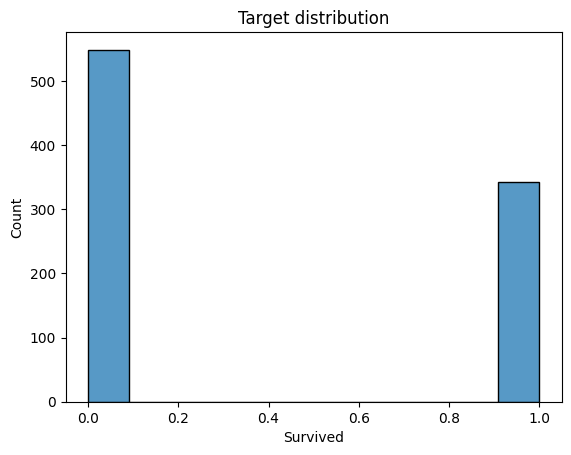

In [ ]:
sns.histplot(df[target])
plt.title('Target distribution')
plt.plot()

[]

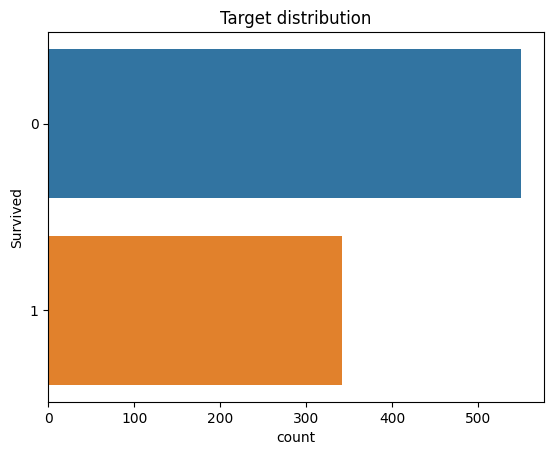

In [ ]:
sns.countplot(data = df, y = target)
plt.title('Target distribution')
plt.plot()

In [ ]:
y.value_counts()     # Distribucion

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
y.value_counts() / df.shape[0]  # Distribucion en %

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Split train-test (NO)

Como estamos en una competicion no sacrificaremos parte del dataset para TEST, haremos Cross-Validation para seleccionar el mejor modelo.

In [ ]:
X_train = X
y_train = y

# Rescaling

Definimos el scaler en el train (.fit_transform).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# vamos a hacer un torneo. Vamos a probar distintos algoritmos, algunos serán lineales (lo que será importante que esté estandarizado el dato), y otors algoritmos como los de reglas que no requieren de estandarizacion.
# best practice: solucion optima, tener un dataset con datos estandarizaros y otro dataset con datos no estandarizados.

In [ ]:
# Estandarización: fit_transform() en train, transform() en test
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns, index= X_train.index)

# TRAIN MODEL

## Model competition

* Prueba distintos modelos de https://scikit-learn.org/stable/modules/classes.html
y mide su performance con Cross Validation.
* Para ello utiliza la funcion evaluate_classification() para registrar los resultados del benchmark de modelos.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

# Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

In [ ]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs:
#   * modelo
#   * (X,y)
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

Algunos modelos a probar:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

Logistic Regression

In [ ]:
evaluate_classification(model = LogisticRegression(),
                   X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.851695,0.842865


Random Forest

In [ ]:
evaluate_classification(model = RandomForestClassifier(),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.862853
0,LogisticRegression(),0.851695,0.842865


XGB Classifier

In [ ]:
evaluate_classification(model = XGBClassifier(),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.863278
2,"XGBClassifier(base_score=None, booster=None, c...",0.999656,0.851078
0,LogisticRegression(),0.851695,0.842865


LGBM Classifier

In [ ]:
evaluate_classification(model = LGBMClassifier(),
                   X=X_train_std, y=y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Info] Number of positive: 257, number of negative: 411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 11
[LightGBM] [Info] [binary:BoostF

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.863278
3,LGBMClassifier(),0.998903,0.862480
2,"XGBClassifier(base_score=None, booster=None, c...",0.999656,0.851078
0,LogisticRegression(),0.851695,0.842865


KNeighborsClassifier

In [ ]:
evaluate_classification(model = KNeighborsClassifier(n_neighbors = 3),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999976,0.863278
3,LGBMClassifier(),0.998903,0.862480
2,"XGBClassifier(base_score=None, booster=None, c...",0.999656,0.851078
0,LogisticRegression(),0.851695,0.842865
4,KNeighborsClassifier(n_neighbors=3),0.942394,0.808897


## Hyperparameter tuning

La hiperparametrización puede ser costosa sino acotamos lo suficiente el abanico de posibles valores. Como consejo, centrarse en hiperparametrizar los primeros valores que aparecen dentro de la funcion del algoritmo, suelen ser los más determinantes, y no dejar de consultar la documentacion para entender que posibles valores adopta cada parametro.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier


In [ ]:
LGBMClassifier?

In [ ]:
parameters_hp = {
    'n_estimators': [10,20,30,40,50,60,70],
    'max_depth': [-1],
    'boosting_type': ['gbdt'],
    'subsample': [0,1,2,3,4]
    }

In [ ]:
search_hp = RandomizedSearchCV(estimator = LGBMClassifier()	,
                               param_distributions = parameters_hp,
                               scoring='roc_auc',
                               cv = 4,
                               n_iter = 100,
                               n_jobs=-1,
                               verbose=True)

In [ ]:
search_hp.fit(X_train_std, y_train)

Fitting 4 folds for each of 35 candidates, totalling 140 fits
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'max_depth': [-1],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70],
                                        'subsample': [0, 1, 2, 3, 4]},
                   scoring='roc_auc', verbose=True)

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best roc_auc:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: LGBMClassifier(n_estimators=70, subsample=1)

 The best roc_auc: 0.8652811580744422

 The best parameters across ALL searched params:
 {'subsample': 1, 'n_estimators': 70, 'max_depth': -1, 'boosting_type': 'gbdt'}


## Final model

Como hemos aplicado hiperparametrizacion, el modelo sera el resultado del proceso (si conseguimos mejorar a la parametrización por default).



In [ ]:
best_model = search_hp.best_estimator_

In [ ]:
best_model

LGBMClassifier(n_estimators=70, subsample=1)

# PREDICT FOR SUBMISSION

Para hacer el submit de los datos en la competicion, tenemos que hacer un predict sobre el dataset 'titanic_test.csv'.

In [ ]:
X_pred = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_SUPERVISADO/Notebooks/ML3 - Kaggle competition/titanic_test.csv')
print(X_pred)
X_pred.head()

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Model features

In [ ]:
features_model =  list(best_model.feature_name_)
print('Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:\n', features_model)

Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Length', 'Cabin_INT', 'Sex_INT', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


## ML Preprocessing

Se deben acometer las mismas transformaciones que las realizadas en el preprocessing del train data:
* Generacion de nuevas variables
* Imputación de nulos (mismos valores)
* One Hot Encoding
* Drop de columnas
<br><br>
No repetimos:
* Analisis exploratorio
* Analisis de altas correlaciones
* Analisis de baja varianza

In [ ]:
X_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X_pred.set_index('PassengerId', inplace=True)

In [ ]:
X_pred['Cabin_letter'] = X_pred['Cabin'].str[0]

In [ ]:
X_pred.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [ ]:
X_pred['Name_Length'] = X_pred['Name'].str.len()

In [ ]:
X_pred.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter,Name_Length
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,16
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,32
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,25
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,16
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,44


In [ ]:
X_pred.drop('Ticket', axis='columns', inplace=True)

In [ ]:
X_pred.drop('Cabin', axis='columns', inplace=True)

In [ ]:
X_pred.drop('Name', axis='columns', inplace=True)

In [ ]:
X_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_letter,Name_Length
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,NaN,16
893,3,female,47.0,1,0,7.0000,S,NaN,32
894,2,male,62.0,0,0,9.6875,Q,NaN,25
895,3,male,27.0,0,0,8.6625,S,NaN,16
896,3,female,22.0,1,1,12.2875,S,NaN,44


In [ ]:
X_pred=X_pred.fillna({
    'Age':-999,
    'Embarked': "Sin_embarque",
    'Cabin_letter': "Sin_cabin",
    })

In [ ]:
categories = list(X_pred.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['Sex', 'Embarked', 'Cabin_letter']


In [ ]:
X_pred["Cabin_INT"]= oe.fit_transform(X_pred[["Cabin_letter"]])

In [ ]:
X_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_letter,Name_Length,Cabin_INT,Sex_INT
PassengerId,,,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,Sin_cabin,16,0.0,0
893,3,female,47.0,1,0,7.0000,S,Sin_cabin,32,0.0,1
894,2,male,62.0,0,0,9.6875,Q,Sin_cabin,25,0.0,0
895,3,male,27.0,0,0,8.6625,S,Sin_cabin,16,0.0,0
896,3,female,22.0,1,1,12.2875,S,Sin_cabin,44,0.0,1


In [ ]:
X_pred.drop('Cabin_letter', axis='columns', inplace=True)

In [ ]:
X_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Length,Cabin_INT,Sex_INT
PassengerId,,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,16,0.0,0
893,3,female,47.0,1,0,7.0000,S,32,0.0,1
894,2,male,62.0,0,0,9.6875,Q,25,0.0,0
895,3,male,27.0,0,0,8.6625,S,16,0.0,0
896,3,female,22.0,1,1,12.2875,S,44,0.0,1


In [ ]:
X_pred["Sex_INT"] = np.where(X_pred["Sex"]=="male",0,1)

In [ ]:
X_pred.drop('Sex', axis='columns', inplace=True)

In [ ]:
X_pred.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Name_Length,Cabin_INT,Sex_INT
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,Q,16,0.0,0
893,3,47.0,1,0,7.0000,S,32,0.0,1
894,2,62.0,0,0,9.6875,Q,25,0.0,0
895,3,27.0,0,0,8.6625,S,16,0.0,0
896,3,22.0,1,1,12.2875,S,44,0.0,1


In [ ]:
categories

['Sex', 'Embarked']

In [ ]:
categories.remove("Sex")

In [ ]:
categories

['Embarked']

In [ ]:
X_pred= pd.get_dummies(X_pred, columns=categories)

In [ ]:
X_pred.head()

,Pclass,Age,SibSp,Parch,Fare,Name_Length,Cabin_INT,Sex_INT,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
892,3,34.5,0,0,7.8292,16,0.0,0,0,1,0
893,3,47.0,1,0,7.0000,32,0.0,1,0,0,1
894,2,62.0,0,0,9.6875,25,0.0,0,0,1,0
895,3,27.0,0,0,8.6625,16,0.0,0,0,0,1
896,3,22.0,1,1,12.2875,44,0.0,1,0,0,1


In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Name_Length  418 non-null    int64  
 6   Cabin_INT    418 non-null    float64
 7   Sex_INT      418 non-null    int64  
 8   Embarked_C   418 non-null    uint8  
 9   Embarked_Q   418 non-null    uint8  
 10  Embarked_S   418 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 30.6 KB


## Check model features

Check de variables. Las variables del dataset para PREDICT deben coincidir con las variables utilizadas en el entrenamiento.

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 11
Variables en modelos: 11
¿Match?: True


In [ ]:
missing_features = [i for i in features_model if i not in features_test]
print('Variables que faltan el el dataset:\n', missing_features)

Variables que faltan el el dataset:
 []


In [ ]:
for col in missing_features:
  X_pred[col]= 0

In [ ]:
drop_features = [i for i in features_test if i not in features_model]
print('Variables que debes eliminar de tu dataset:\n', drop_features)

Variables que debes eliminar de tu dataset:
 []


In [ ]:
X_pred.drop(columns = drop_features, inplace=True)

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 11
Variables en modelos: 11
¿Match?: True


In [ ]:
# Reordena variables
X_pred = X_pred[features_model]

## Rescaling

Aplicamos mismo scaler que en el training (".transform", no hacer ".fit")

In [ ]:
X_pred_std = scaler.transform(X_pred)

In [ ]:
X_pred_std

array([[ 0.82737724,  0.50933652, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971],
       [ 0.82737724,  0.53977662,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-0.36936484,  0.57630473, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971],
       ...,
       [ 0.82737724,  0.51907735, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 0.82737724, -2.00745082, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 0.82737724, -2.00745082,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.61470971]])

In [ ]:
X_pred_std = pd.DataFrame(X_pred_std, columns = X_pred.columns, index= X_pred.index)

In [ ]:
X_pred_std

,Pclass,Age,SibSp,Parch,Fare,Name_Length,Cabin_INT,Sex_INT,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
892,0.827377,0.509337,-0.474545,-0.473674,-0.490783,-1.182055,-0.488461,-0.737695,-0.482043,3.251373,-1.614710
893,0.827377,0.539777,0.432793,-0.473674,-0.507479,0.542753,-0.488461,1.355574,-0.482043,-0.307562,0.619306
894,-0.369365,0.576305,-0.474545,-0.473674,-0.453367,-0.211850,-0.488461,-0.737695,-0.482043,3.251373,-1.614710
895,0.827377,0.491072,-0.474545,-0.473674,-0.474005,-1.182055,-0.488461,-0.737695,-0.482043,-0.307562,0.619306
896,0.827377,0.478896,0.432793,0.767630,-0.401017,1.836359,-0.488461,1.355574,-0.482043,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...,...,...
1305,0.827377,-2.007451,-0.474545,-0.473674,-0.486337,-0.966454,-0.488461,-0.737695,-0.482043,-0.307562,0.619306
1306,-1.566107,0.520295,-0.474545,-0.473674,1.544246,0.111551,1.398325,1.355574,2.074505,-0.307562,-1.614710
1307,0.827377,0.519077,-0.474545,-0.473674,-0.502445,0.111551,-0.488461,-0.737695,-0.482043,-0.307562,0.619306


## Predictions

In [ ]:
predictions = best_model.predict(X_pred_std)

# Upload predictions to Kaggle.com

Se deben subir las predicciones en un .csv con 2 columnas (PassengerId, Survived) en el apartado de submissions en https://www.kaggle.com/competitions/titanic/data. Debe contener 418 rows + header.

In [ ]:
submission = pd.DataFrame(predictions, columns=['Survived'], index = X_pred.index)

In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_SUPERVISADO/Notebooks/ML3 - Kaggle competition/predictions.csv')